# Import thư viện.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
import warnings
from sklearn import preprocessing,tree
from sklearn.model_selection import GridSearchCV

# Loading file dữ liệu 

In [2]:
train_dt = pd.read_csv("E:/Lab/Data/Titanic_Task/train.csv")
test_dt = pd.read_csv("E:/Lab/Data/Titanic_Task/test.csv")

In [3]:
train_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_dt.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Perreault, Miss. Anne",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Kiểm tra kiểu dữ liệu

In [5]:
train_dt.dtypes.sort_values()

PassengerId      int64
Survived         int64
Pclass           int64
SibSp            int64
Parch            int64
Age            float64
Fare           float64
Name            object
Sex             object
Ticket          object
Cabin           object
Embarked        object
dtype: object

# Khảo sát dữ liệu

0    549
1    342
Name: Survived, dtype: int64

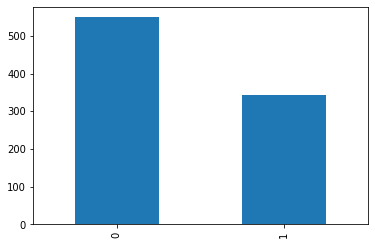

In [6]:
#Khảo sát cột survived
train_dt['Survived'].value_counts().plot(kind="bar")
train_dt['Survived'].value_counts()

Có thể thấy có 549 người chết và 342 người sống

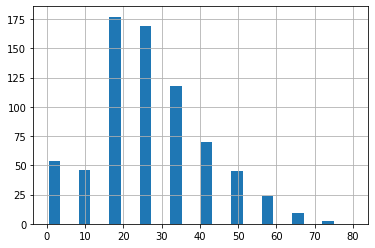

In [7]:
#Khảo sát cột 'Age'
train_dt["Age"].hist(width=3)

Cho thấy độ tuổi phổ biến ở khoảng 20 đến 40

male      577
female    314
Name: Sex, dtype: int64

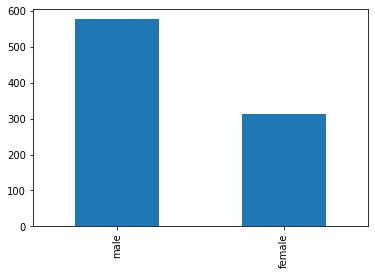

In [8]:
#Khảo sát giới tính
train_dt['Sex'].value_counts().plot(kind="bar")
train_dt['Sex'].value_counts()

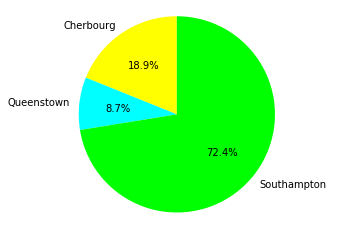

In [9]:
#Khảo sát cột Embarked
labels="Cherbourg","Queenstown","Southampton"
sizes=[sum(train_dt["Embarked"]=="C"),sum(train_dt["Embarked"]=="Q"),sum(train_dt["Embarked"]=="S")]
colors=["yellow","aqua","lime"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%',startangle=90)
 
plt.axis('equal')
plt.show()

# Phân tích dữ liệu độ sống còn so với chỉ số của các cột

In [10]:
#Hàm phân tích 
def survival_stacked_bar(variable):
    Died=train_dt[train_dt["Survived"]==0][variable].value_counts()/len(train_dt["Survived"]==0)
    Survived=train_dt[train_dt["Survived"]==1][variable].value_counts()/len(train_dt["Survived"]==1)
    data=pd.DataFrame([Died,Survived])
    data.index=["Die","Survived"]
    data.plot(kind="bar",stacked=True,title="Percentage")
    return data.head()

,male,female
Die,0.525253,0.090909
Survived,0.122334,0.261504


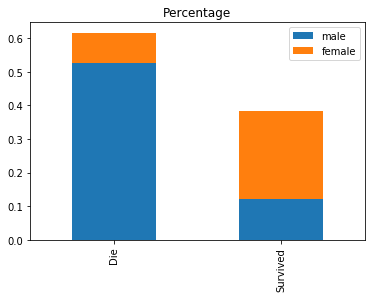

In [11]:
#So với cột "Sex"
survival_stacked_bar("Sex")

Cho thấy 'female' có khả năng sống cao hơn

,1,2,3
Die,0.089787,0.108866,0.417508
Survived,0.152637,0.097643,0.133558


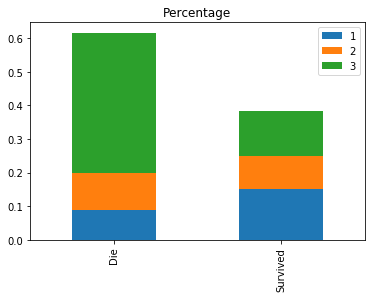

In [12]:
survival_stacked_bar("Pclass")

Khả năng sống gần như nhau

,S,C,Q
Die,0.479237,0.084175,0.05275
Survived,0.243547,0.104377,0.03367


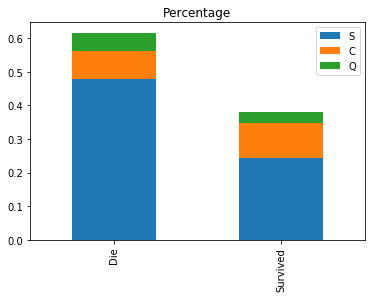

In [13]:
survival_stacked_bar("Embarked")

Cho thấy khả năng sống của giá trị "S" trong cột Embarked là cao nhất

# Kiểm tra dữ liệu bị thiếu

In [14]:
train_dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Thêm dữ liệu trống

In [15]:
#thêm cột Age : thêm vào các trường trống bằng mean của Age
train_dt['Age'] = train_dt['Age'].fillna(train_dt['Age'].mean())

In [16]:
#thêm vào cột Cabin bằng "unknow"
train_dt['Cabin'] = train_dt['Cabin'].fillna("unknow")

In [17]:
train_dt["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
#thêm vào nhưng ô trống của cột Embarked ký tự "S" vì "S" xuất hiện nhiều nhất
train_dt['Embarked'] = train_dt['Embarked'].fillna('S')

In [19]:
#kiểm tra lại
train_dt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
#Chuyển giá trị male và female của cột Sex thành 2 số 0 1
train_dt = pd.get_dummies(train_dt, columns=['Sex'])
train_dt.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,unknow,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,unknow,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,unknow,S,0,1


In [21]:
# Tiếp tục mã hoá cột "Embarked"
train_dt = pd.get_dummies(train_dt, columns=['Embarked'])
train_dt.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,unknow,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,unknow,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,unknow,0,1,0,0,1


In [22]:
# chọn ra các cột đem vào phân lớp 
name_colums = ['Pclass','Age', 'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Parch', 'SibSp', 'Fare']
train_class = train_dt[['Survived']]
data_train = train_dt[name_colums]
data_train.head()

,Pclass,Age,Sex_male,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Parch,SibSp,Fare
0,3,22.0,1,0,0,0,1,0,1,7.2500
1,1,38.0,0,1,1,0,0,0,1,71.2833
2,3,26.0,0,1,0,0,1,0,0,7.9250
3,1,35.0,0,1,0,0,1,0,1,53.1000
4,3,35.0,1,0,0,0,1,0,0,8.0500


[Text(160.9190625, 212.49818181818182, 'X[3] <= 0.5\ngini = 0.462\nsamples = 596\nvalue = [380, 216]'),
 Text(70.040625, 202.61454545454546, 'X[1] <= 13.0\ngini = 0.279\nsamples = 382\nvalue = [318, 64]'),
 Text(18.6, 192.73090909090908, 'X[8] <= 2.0\ngini = 0.477\nsamples = 28\nvalue = [11, 17]'),
 Text(11.16, 182.84727272727272, 'X[7] <= 0.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(7.44, 172.96363636363637, 'X[8] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(3.72, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(11.16, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(14.88, 172.96363636363637, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(26.040000000000003, 182.84727272727272, 'X[7] <= 1.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(22.32, 172.96363636363637, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(29.76, 172.96363636363637, 'X[1] <= 3.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(26.0

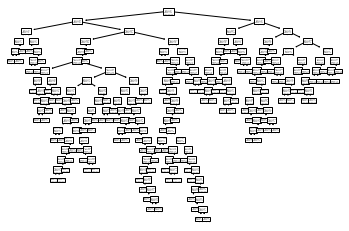

In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
X_train, X_test, y_train, y_test = train_test_split(data_train, train_class, test_size=0.33)
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
tree.plot_tree(clf_tree) 

In [24]:
test_dt.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
test_dt["Age"] = test_dt['Age'].fillna(test_dt["Age"].mean())
test_dt["Cabin"] = test_dt['Cabin'].fillna('Unknow')
test_dt['Fare']= test_dt['Fare'].fillna(test_dt['Fare'].mean())
test_dt.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
test_dt = pd.get_dummies(test_dt, columns=['Sex'])
test_dt = pd.get_dummies(test_dt, columns=['Embarked'])

In [27]:
ids = test_dt['PassengerId']
test_feature = test_dt[name_colums]
predictions = clf_tree.predict(test_feature)
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.head()
output.to_csv('submission1.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [32]:

#0.738
from sklearn.svm import SVC
clf_svc = SVC(kernel = "linear")
clf_svc.fit(X_train , y_train)
predictions_2= clf_svc.predict(test_feature)
output2 = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output2.head()
output.to_csv('submission2.csv', index=False)
#0.739

C:\Users\long\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
